In [35]:
from pathlib import Path
import yaml
import numpy as np
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import astropy.units as u
from matplotlib import pyplot as plt
from matplotlib.colors import PowerNorm
import seaborn as sns

import mes_longslit as mes

In [2]:
sns.set_context("talk")

In [3]:
c0 = SkyCoord("21 14 20.03 +43 41 36.0", unit=(u.hourangle, u.deg))
c0.ra.deg, c0.dec.deg

(318.58345833333334, 43.69333333333333)

/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:192: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:192: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:192: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:192: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:192: RuntimeWarning: invalid

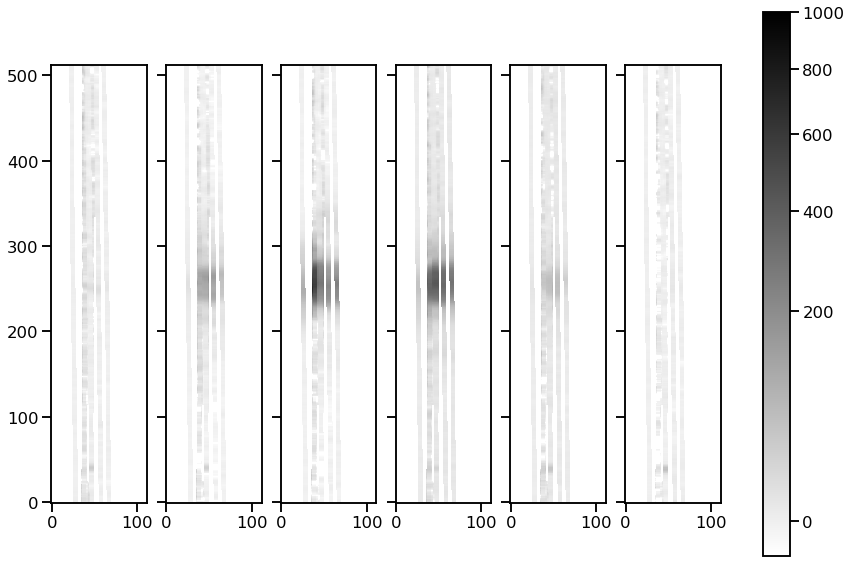

In [70]:
fig, axes = plt.subplots(
    1, 6, 
    figsize=(15, 10), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip([-80, -60, -40, -20, 0, 20], axes):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width=2.0, dvel=20.0, line_id="oiii",
    )
    hdu = hdulist["scaled"]
    im = ax.imshow(
        hdu.data[:, 200:-200], 
        norm=PowerNorm(gamma=0.5, vmin=-4.0, vmax=1000.0), 
        cmap="gray_r",
        origin="lower",
    )
fig.colorbar(im, ax=axes)